In [1]:
import numpy as np
import pandas as pd
import scipy, scipy.stats
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.mixture import GMM
import seaborn as sns
from skimage import transform
from sklearn.datasets import load_digits
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# KNN

In [2]:
traindata = pd.read_csv("data/zip.train", header=None, sep=" ")
datawithouttargets = traindata.iloc[:,1:-1] #Zeilen ohne Targets und letzte Spalte 
targetcolumntrain = traindata.iloc[:,0] #nur die Spalte mit den Targets
testdata = pd.read_csv("data/zip.test", header=None, sep=" ") #Datensatz zum Testen der Vorhersage 
targetcolumntest = testdata.iloc[:,0]

In [3]:
matrixfortraining = traindata.iloc[:,1:-1]
matrixtoprooftraining = traindata.iloc[:,0:-1]

In [4]:
matrixfortesting = testdata.iloc[:,1:]
matrixtoprooftesting = testdata.iloc[:,0:]

In [5]:
acc_train=[]
acc_test=[]
k=[]

In [6]:
rangeinput=np.array([0,1,2,3,4,5,6,7,8,9])
for i in range(1,20):
    anzahl_neighbors = i  
    k.append(i)
    model = KNeighborsClassifier(n_neighbors=i,algorithm = 'brute').fit(matrixfortraining,targetcolumntrain)
    trainlabels = model.predict(matrixfortraining)
    testlabels = model.predict(matrixfortesting)
    trainlabels_2 = np.zeros_like(trainlabels)
    testlabels_2 = np.zeros_like(testlabels)
    for j in range(0, len(rangeinput)):
        mask = (trainlabels == rangeinput[j])
        trainlabels_2[mask] = mode(targetcolumntrain[mask])[0]
    acc_train.append(accuracy_score(targetcolumntrain, trainlabels_2))
    for j in range(0, len(rangeinput)):
        mask = (testlabels == rangeinput[j])
        testlabels_2[mask] = mode(targetcolumntest[mask])[0]
    acc_test.append(accuracy_score(targetcolumntest, testlabels_2))

In [7]:
opt_k = pd.DataFrame()
opt_k['k'] = k
opt_k['Acc Trainingsdaten'] = acc_train
opt_k['Acc Testdaten'] = acc_test

In [8]:
opt_k

,k,Acc Trainingsdaten,Acc Testdaten
0,1,1.000000,0.943697
1,2,0.983679,0.941206
2,3,0.986696,0.944694
3,4,0.980661,0.943199
4,5,0.979152,0.944694
5,6,0.975861,0.938714
6,7,0.974215,0.941704
7,8,0.972432,0.940708
8,9,0.970923,0.937220
9,10,0.969140,0.935725


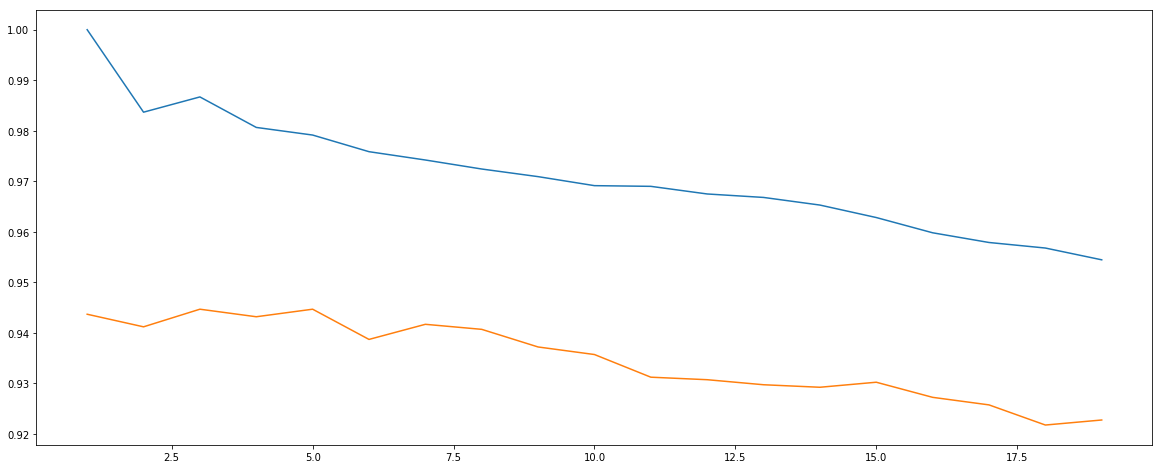

In [9]:
plt.figure(figsize=(20,8))
plt.plot(k,acc_train)
plt.plot(k,acc_test)
plt.show()